# Challenge Problem description
We are an agency helping our customers purchase XoX (a made-up product) from various makers. Price is one of the most important things we care about. We need to estimate the price of a XoX before we recommend it to our customers. However, the estimations vary significantly with our employees' experience. 

We would like you to build a machine learning model to accurately predict the price for a future purchase and provide insights to help us explain the predicted price to our customers. Please note that neither our customers nor us have any knowledge about machine learning. A sample of our sales record is available in ../data/sales.csv.


1. Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice. Any thing you would like us to know about the price?
2. Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, what alternatives you consider, and any concerns you have. How is the performance of your model?
3. Help us understand how the price is predicted (again, a few sentences will suffice).

# Steps:
Pre-model Analysis: process and visualize data; get insights of features and target.

Problem Definition: translate the business needs into machine learning problems; design metrics to measure model performance.

Feature Engineering: create features which might improve model performance.

Modeling: Model selection, feature elimination, validation, hyperparameter tuning.

Post-model Analysis: Model performance, feature importance, actionable suggestions to business.




# Data cleaning, Visualization and preprocessing


## read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv(sales_original.csv)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


df.info()

In [3]:
df.columns

Index(['cost', 'price', 'weight', 'purchase_date', 'product_type',
       'product_level', 'maker', 'ingredient', 'height', 'width', 'depth'],
      dtype='object')

## Numerical features

### convert str to float 

In [4]:
#define functions to convert str data to numbers
def cost2num(x):
    if type(x)== str:
        x = x.strip('$').strip('k')
        return float(x)*1000
    else:
        return x
def price2num(x):
    if type(x) == str:
        x = x.strip('$').replace(',','')
        return float(x)
    else:
        return x
def weight2num(x):
    if type(x) == str:
        x = x.strip('Kg')
        x_list = x.split('Ton')
        return float(x_list[0])*1000 + float(x_list[1])
def height2num(x):
    if type(x) == str:
        x = x.strip('meters')
        return float(x)
def width2num(x):
    if type(x) == str:
        x = x.strip('cm')
        return float(x)
def depth2num(x):
    if type(x) == str:
        x = x.strip('cm')
    return float(x)
    

In [5]:
#replace the columns with converted data
df['cost']=df.cost.map(cost2num)
df['price']=df.price.map(price2num)
df['weight']=df.weight.map(weight2num)
df['height']=df.height.map(height2num)
df['width']=df.width.map(width2num)
df['depth']=df.depth.map(depth2num)

In [6]:
#re-organized columns to show numberical data in the front
df = df.reindex(columns = ['cost','weight','height', 'width', 'depth', 'purchase_date', 'product_type',
       'product_level', 'maker', 'ingredient', 'price'])

In [8]:
#df.info()

### Visualize how the numerical data relationship with Price

In [7]:
my_num_df = df.select_dtypes(exclude='object')
my_num_df['volume'] = df.weight*df.height*df.depth
my_num_df.head()

,cost,weight,height,width,depth,price,volume
0,333000.0,3090.0,2.76,97.0,26.0,300492.0,221738.4
1,NaN,3030.0,2.67,98.0,26.0,430570.0,210342.6
2,270000.0,3040.0,3.00,93.0,24.0,213070.0,218880.0
3,NaN,3050.0,2.50,102.0,27.0,229174.0,205875.0
4,97000.0,2970.0,2.47,101.0,26.0,122659.0,190733.4


<Figure size 4000x3600 with 0 Axes>

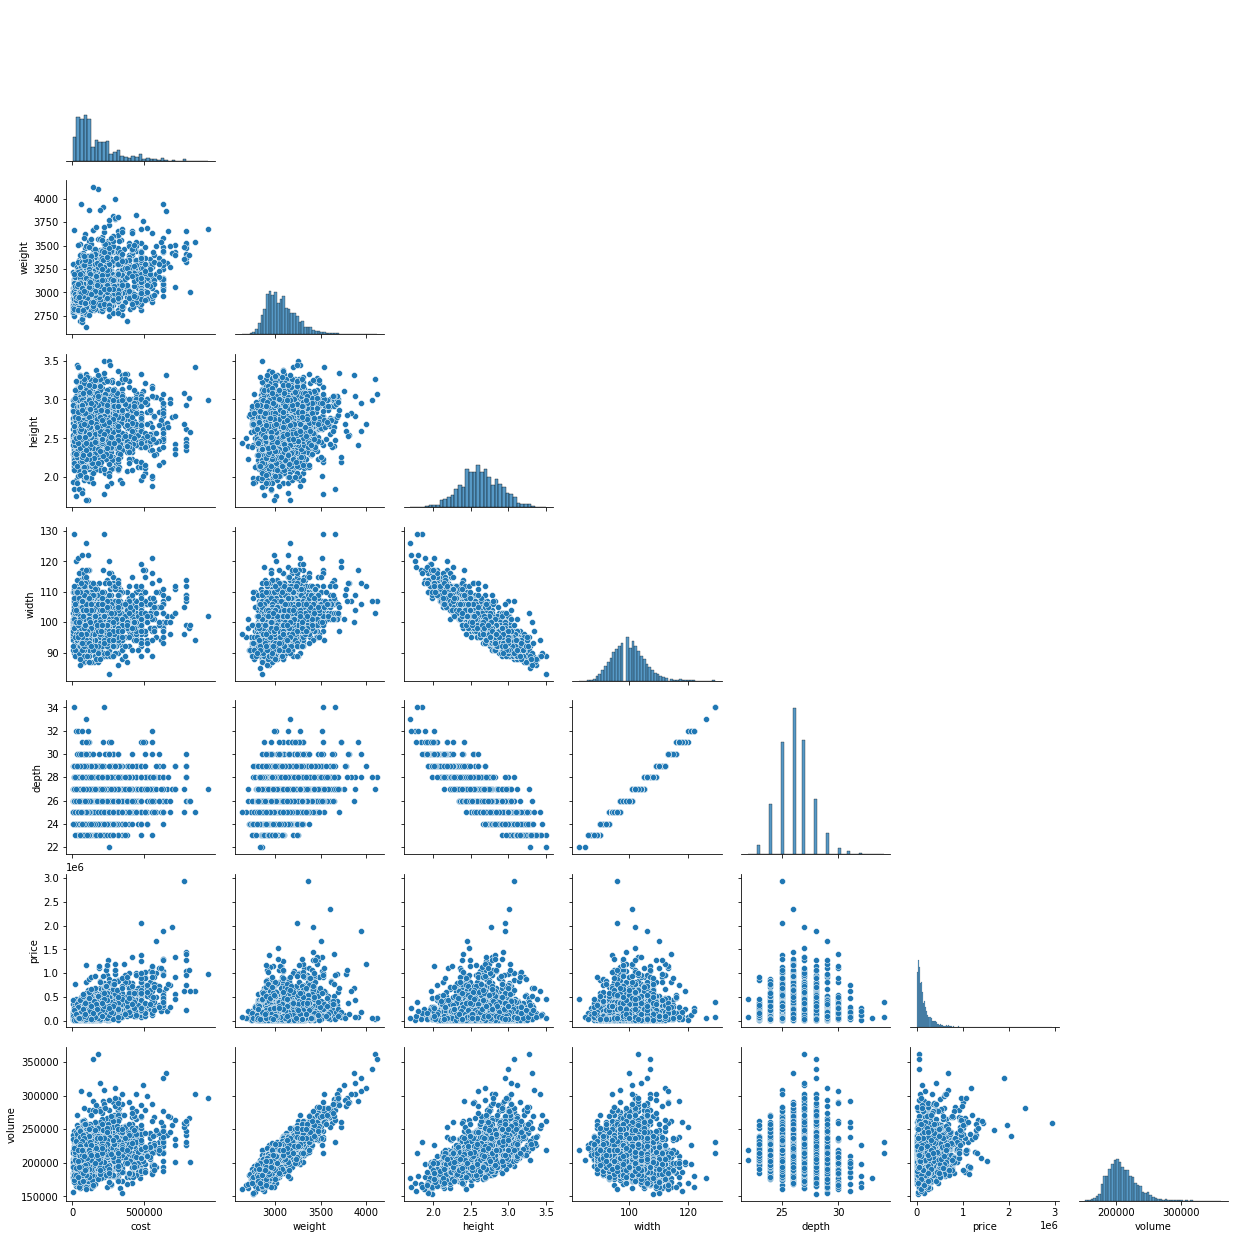

In [8]:
plt.figure(figsize=(20,18),dpi=200)
sns.pairplot(my_num_df,corner=True)

### numerical data summary 
From the pairplots,  we can see that 
1. Price has some linear relationship with cost,but no obvious trend with other features. 
2. Width, depth, weight, height showed collinearity between each other.  We may drop one of them. 
3. Since volume and weight are highly related, so no need to use volumne together with weight. 

## Purchase data

In [9]:
df.purchase_date.head()

0    Dec 19 2008
1    Sep 10 1997
2    Sep 05 2001
3    Dec 23 2016
4    Jan 12 2000
Name: purchase_date, dtype: object

In [10]:
purchase_date = pd.to_datetime(df.purchase_date)

In [11]:
profit = df.price.values - df.cost

In [12]:
profit.index = purchase_date
profit.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3197 entries, 2008-12-19 to 2003-06-13
Series name: cost
Non-Null Count  Dtype  
--------------  -----  
2211 non-null   float64
dtypes: float64(1)
memory usage: 50.0 KB


<AxesSubplot:title={'center':'yearly counts'}, xlabel='purchase_date'>

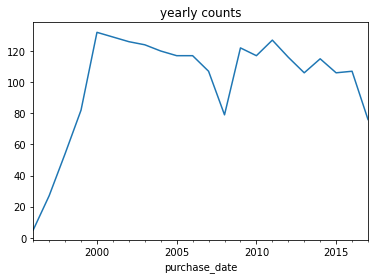

In [13]:
profit.dropna().resample('Y').count().plot(title='yearly counts')

<AxesSubplot:title={'center':'yearly mean profit'}, xlabel='purchase_date'>

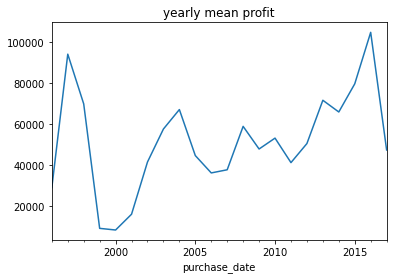

In [14]:
profit.dropna().resample('Y').mean().plot(title='yearly mean profit')

In [15]:
df_tmp = pd.DataFrame({'price':df.price,
                       'cost': df.cost,
                       'profit':profit.values, 
                       'year':purchase_date.dt.year,
                       'month':purchase_date.dt.month,
                      'weekday':purchase_date.dt.weekday})
df_tmp.head()

,price,cost,profit,year,month,weekday
0,300492.0,333000.0,-32508.0,2008.0,12.0,4.0
1,430570.0,NaN,NaN,1997.0,9.0,2.0
2,213070.0,270000.0,-56930.0,2001.0,9.0,2.0
3,229174.0,NaN,NaN,2016.0,12.0,4.0
4,122659.0,97000.0,25659.0,2000.0,1.0,2.0


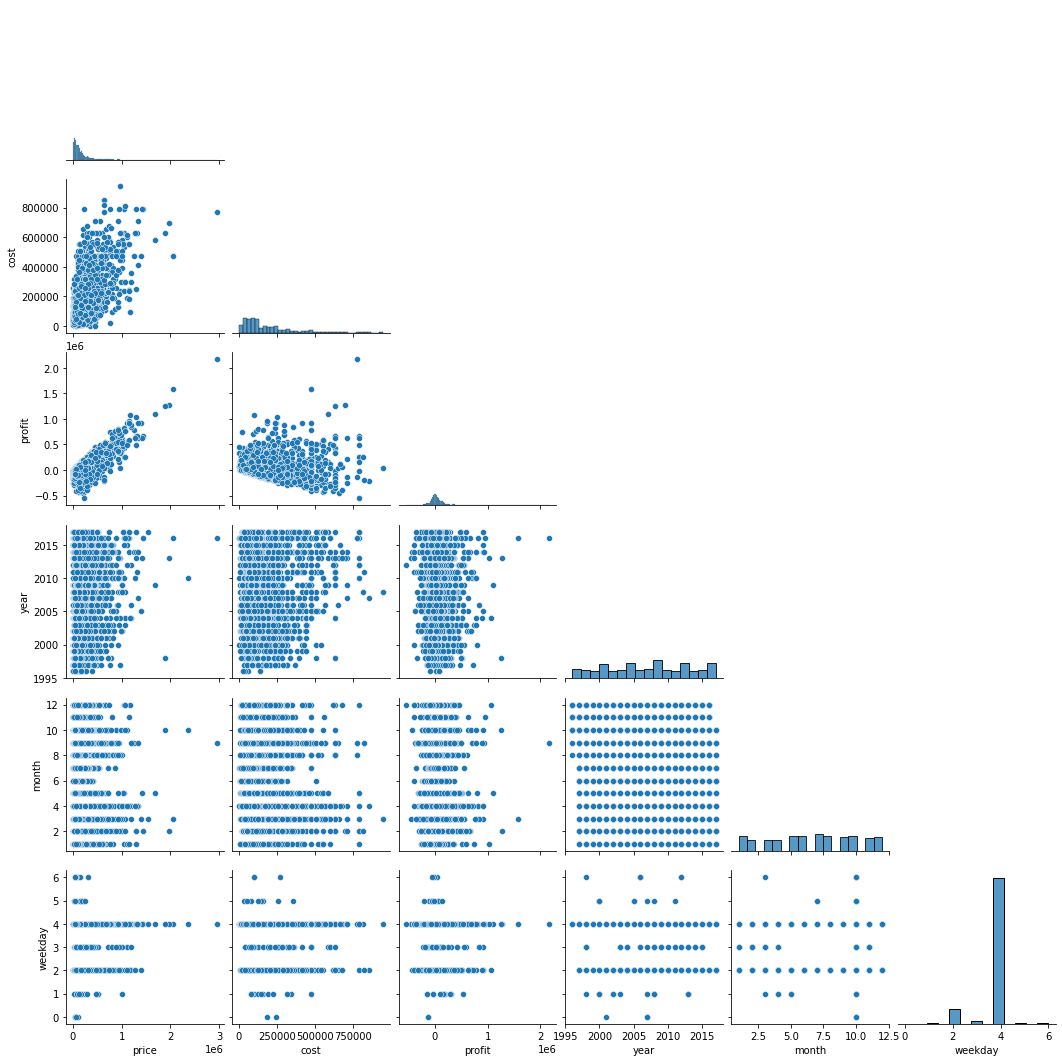

In [16]:
sns.pairplot(data=df_tmp,corner=True )

<AxesSubplot:title={'center':'yearly mean cost'}, xlabel='year'>

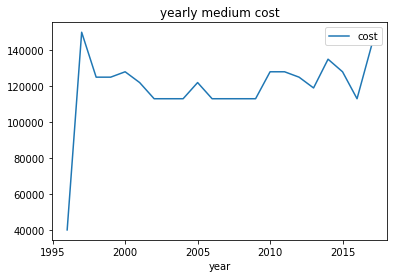

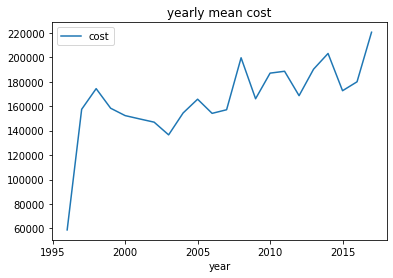

In [17]:
df_tmp.dropna(subset='price').groupby('year').median().iloc[:,1:2].plot(title='yearly medium cost')#medium cost
df_tmp.dropna(subset='price').groupby('year').mean().iloc[:,1:2].plot(title='yearly mean cost') #mean cost

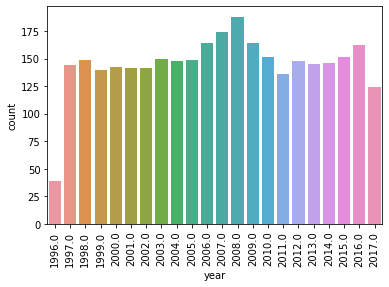

In [18]:
sns.countplot(x='year', data=df_tmp)
plt.xticks(rotation='90');

<AxesSubplot:title={'center':'monthly mean sold product'}, xlabel='month'>

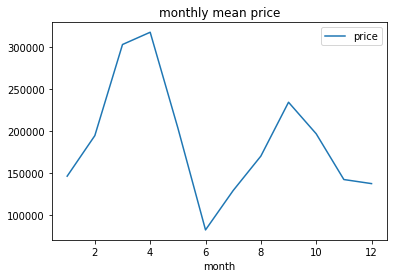

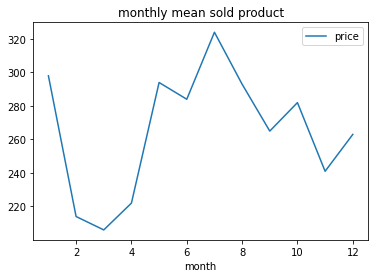

In [19]:
df_tmp.dropna(subset='price').groupby('month').mean().iloc[:,:1].plot(title='monthly mean price')
df_tmp.dropna(subset='price').groupby('month').count().iloc[:,:1].plot(title='monthly mean sold product')

<AxesSubplot:title={'center':'weekday median price'}, xlabel='weekday'>

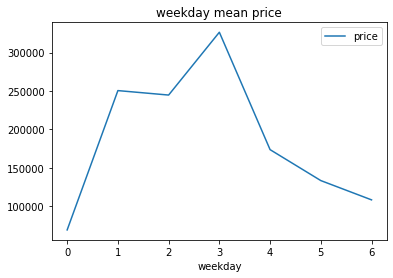

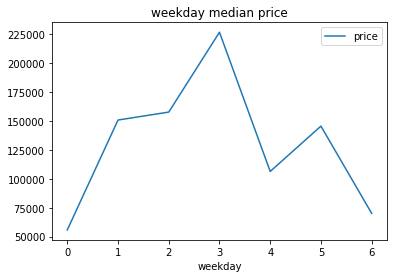

In [20]:
df_tmp.dropna(subset='price').groupby('weekday').mean().iloc[:,:1].plot(title='weekday mean price')
df_tmp.dropna(subset='price').groupby('weekday').median().iloc[:,:1].plot(title='weekday median price')

### Summary about time features:
1. The average price is generally increased with the year, But there is a big decrease around 2008, and a trend of decreasing after 2015. 
2. The mean price is higher is April and Septempber. 
3. The mean price is higher on Wednesdays. 
3. The yearly medium cost is more constant than mean cost

## Categorical features: 
maker, product_type, product_level, ingredients

In [21]:
my_object_df = df.select_dtypes(include='object')


In [22]:
my_object_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   purchase_date  3196 non-null   object
 1   product_type   3196 non-null   object
 2   product_level  3196 non-null   object
 3   maker          2373 non-null   object
 4   ingredient     2941 non-null   object
dtypes: object(5)
memory usage: 125.0+ KB


### product_level

In [23]:
# can use ordinal coding
my_object_df['product_level'] = my_object_df['product_level'].map({'unrated':0, 
                                                                   'basic':1,
                                                                   'intermediate':2,
                                                                   'advanced':3,
                                                                   'super advanced':4})

In [24]:
my_object_df.product_level.unique()

array([ 3.,  1.,  4.,  2., nan,  0.])

<AxesSubplot:>

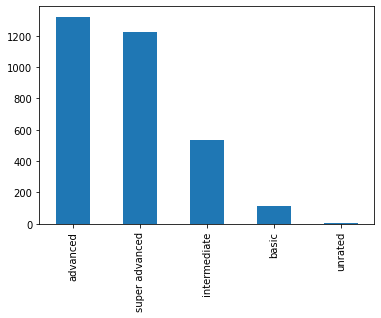

In [25]:
df.product_level.value_counts().plot(kind='bar') 
# There are 4 kinds of product level, and most of them are 'advanced and 'super advanced'. 


### maker info

In [26]:
df.maker.info()  # 1/3 empty data for maker

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: maker
Non-Null Count  Dtype 
--------------  ----- 
2373 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [27]:
len(df.maker.unique()) # 1/3 values are unique

883

<AxesSubplot:xlabel='maker', ylabel='count'>

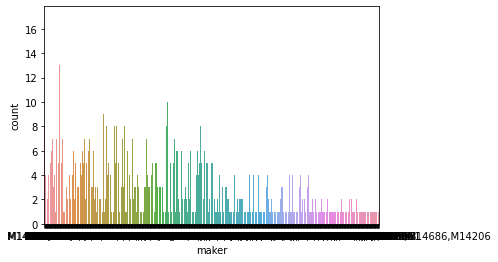

In [28]:
sns.countplot(x='maker', data=df)  # Most makers are unique. 

In [29]:
maker_dict = df.maker.value_counts().to_dict()  # use frequence to code

In [30]:
my_object_df['maker'] = df['maker'].map(maker_dict)

In [31]:
my_object_df['maker'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: maker
Non-Null Count  Dtype  
--------------  -----  
2373 non-null   float64
dtypes: float64(1)
memory usage: 25.1 KB


### product_type

In [32]:
df.product_type.info() #only one empty data

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: product_type
Non-Null Count  Dtype 
--------------  ----- 
3196 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [33]:
len(df.product_type.unique()) #65 unique product_type

65

<AxesSubplot:ylabel='product_type'>

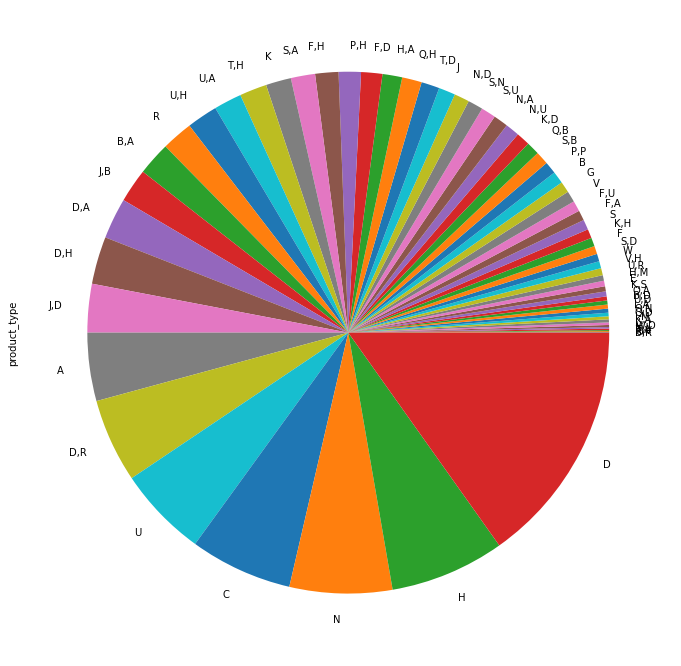

In [34]:
df.product_type.value_counts(ascending=True).plot(kind='pie', figsize=(12,12))

In [35]:
product_type_dict = df.product_type.value_counts().to_dict() # use frequence to code

In [36]:
my_object_df['product_type'] = df['product_type'].map(product_type_dict)

### ingredient

In [37]:
df.ingredient.info()  

<class 'pandas.core.series.Series'>
RangeIndex: 3197 entries, 0 to 3196
Series name: ingredient
Non-Null Count  Dtype 
--------------  ----- 
2941 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [38]:
len(df.ingredient.unique()) # Most product has different ingredients combinations

2834

In [39]:
expanded_ingred = df.ingredient.str.split(',',expand=True)

expanded_ingred.head() # The max ingredients in the products are 27.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,IN732052,IN732053,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,IN732054,IN732055,IN732056,IN732057,IN732058,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,IN732054,IN732059,IN732060,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,IN732061,IN732062,IN732063,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,IN732064,IN732065,IN732066,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [40]:
len(expanded_ingred.stack().unique()) #  There are 2037 unique ingredients

2037

In [41]:
# split the ingredients, and get the number
def split(x):
    if type(x) == str:
        x = x.split(',')
        return len(x)
    else:
        return 0
my_object_df['ingredient'] = my_object_df.ingredient.map(split)
                        

In [42]:
my_object_df.head()

,purchase_date,product_type,product_level,maker,ingredient
0,Dec 19 2008,26.0,3.0,8.0,2
1,Sep 10 1997,96.0,1.0,NaN,5
2,Sep 05 2001,96.0,1.0,NaN,3
3,Dec 23 2016,179.0,3.0,1.0,3
4,Jan 12 2000,166.0,3.0,NaN,3


## Feature engineering summary:


11 features in total
### Numberical: 5
            Cost, 
            weight, 
            height, width, depth: can drop one. 
### Categorical: 4 
             maker: a lot of missing, can drop.  Or use frequence, fillna with median
             product_type: too many unique values, but few missing.  Use freqence
             product_level: only 5 unique. use ordinal coding
             Ingredients. A lot of unique values.  Use number of ingredients. 
### Date: 2
             use month, and weekday
            
            

# Building models

### Train_test_split

In [43]:
df.dropna(subset='price',inplace=True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df.shape

(3186, 11)

In [46]:
features = list(df.columns)
target = 'price'
features.remove(target)
X = df[features]
y = df[target]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [48]:
X_train.shape

(2708, 10)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2708 entries, 279 to 3185
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cost           1880 non-null   float64
 1   weight         2706 non-null   float64
 2   height         2706 non-null   float64
 3   width          2706 non-null   float64
 4   depth          2706 non-null   float64
 5   purchase_date  2708 non-null   object 
 6   product_type   2708 non-null   object 
 7   product_level  2708 non-null   object 
 8   maker          2013 non-null   object 
 9   ingredient     2493 non-null   object 
dtypes: float64(5), object(5)
memory usage: 232.7+ KB


In [50]:
#import linear regression related modules
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

In [51]:
train_MSE = []
train_MAE = []
train_r2 = []
train_adjusted_r2 =[]
test_MSE = []
test_MAE = []
test_r2 = []
test_adjusted_r2 = []

In [52]:
# define train_loss function
def loss(train, X_train, y_train, model):
    r2 = r2_score(y_train, model.predict(X_train))
    n = len(X_train)
    p = len(X_train.columns)
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('train','MAE: {0:.2e}'.format(mean_absolute_error(y_train, model.predict(X_train))))
    print('train','MSE: {0:.2e}'.format(mean_squared_error(y_train, model.predict(X_train))))
    print('train','r2: {0:.3f}'.format(r2_score(y_train, model.predict(X_train))))
    print('train','adjusted_r2:{0:.3f}'.format(adjusted_r2))
    train_MAE.append(mean_absolute_error(y_train, model.predict(X_train)))
    train_MSE.append(mean_squared_error(y_train, model.predict(X_train)))
    train_r2.append(r2_score(y_train, model.predict(X_train)))
    train_adjusted_r2.append(adjusted_r2)
                   
    

In [53]:
# define test_loss function
def loss(test, X_test, y_test, model):
    r2 = r2_score(y_test, model.predict(X_test))
    n = len(X_test)
    p = len(X_test.columns)
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print(test,'MAE: {0:.2e}'.format(mean_absolute_error(y_test, model.predict(X_test))))
    print(test,'MSE: {0:.2e}'.format(mean_squared_error(y_test, model.predict(X_test))))
    print(test,'r2: {0:.3f}'.format(r2_score(y_test, model.predict(X_test))))
    print(test,'adjusted_r2:{0:.3f}'.format(adjusted_r2))
#     test_MAE.append(mean_absolute_error(y_test, model.predict(X_test)))
#     test_MSE.append(mean_squared_error(y_test, model.predict(X_test)))
#     test_r2.append(r2_score(y_test, model.predict(X_test)))
#     test_adjusted_r2.append(adjusted_r2)
#     print('test_MAE:', test_MAE)
#     print('test_MSE:', test_MSE)
#     print('test_r2:', test_r2)
#     print('test_adjusted_r2:', test_adjusted_r2)                 
    

In [54]:
import numpy as np

## Data tranformer fillna w median

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
class Num_Date_Cat_Transformer():
    def fit(self,X,y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        df['depth'] = X.depth
        df['width'] = X.width
        df['height'] = X.height
        df['weight'] = X.weight
        purchase_date = pd.to_datetime(X.purchase_date)
        df['weekday']=purchase_date.dt.weekday
        df['month']=purchase_date.dt.month
        df['product_level'] = X.product_level.map({'unrated':0, 'basic':1,
                                                      'intermediate':2,'advanced':3,'super advanced':4})
        
        self.product_type_dict = X.product_type.value_counts().to_dict() # frequency of each product
        df['product_type'] = X.product_type.map(self.product_type_dict)
        self.maker_dict = X.maker.value_counts().to_dict()
        df['maker'] = X.maker.map(self.maker_dict)  # frequency of each maker
        df['ingredient'] = X.ingredient.map(split)  # number of ingredient
        self.mean = df.mean()                                             
                                                 
    def transform(self,X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        df['depth'] = X.depth
        df['width'] = X.width
        df['height'] = X.height
        df['weight'] = X.weight
        purchase_date = pd.to_datetime(X.purchase_date)
        df['weekday']=purchase_date.dt.weekday
        df['month']=purchase_date.dt.month
        df['product_level'] = X['product_level'].map({'unrated':0, 'basic':1,
                                                      'intermediate':2,'advanced':3,'super advanced':4})
        df['product_type'] = X.product_type.map(self.product_type_dict)
        
        df['maker'] = X.maker.map(self.maker_dict)  # frequency of each maker
        df['ingredient'] = X.ingredient.map(split)  # number of ingredient
        return df.fillna(self.mean)
    
    def fit_transform(self,X,y=None):
        self.fit(X,y)
        return self.transform(X,y)
    
    def split(x):
        if type(x) == str:
            x = x.split(',')
            return len(x)
        else:
            return 0
        
    

In [57]:
ndc = Num_Date_Cat_Transformer()
ndc_X = ndc.fit_transform(X_train)

In [58]:
ndc_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2708 entries, 279 to 3185
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cost           2708 non-null   float64
 1   depth          2708 non-null   float64
 2   width          2708 non-null   float64
 3   height         2708 non-null   float64
 4   weight         2708 non-null   float64
 5   weekday        2708 non-null   int64  
 6   month          2708 non-null   int64  
 7   product_level  2708 non-null   int64  
 8   product_type   2708 non-null   int64  
 9   maker          2708 non-null   float64
 10  ingredient     2708 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 253.9 KB


In [59]:
ndc_X.head()

,cost,depth,width,height,weight,weekday,month,product_level,product_type,maker,ingredient
279,659000.000000,27.0,102.0,2.70,3310.0,4,3,3,115,7.000000,5
1012,169430.319149,28.0,108.0,2.31,3170.0,4,11,4,145,4.244908,2
1574,66000.000000,28.0,105.0,2.46,3200.0,4,3,4,145,1.000000,6
1507,169430.319149,27.0,104.0,2.43,3120.0,4,1,4,50,4.244908,2
595,144000.000000,27.0,101.0,2.39,2890.0,4,6,4,50,9.000000,4


In [60]:
ndc_X.columns

Index(['cost', 'depth', 'width', 'height', 'weight', 'weekday', 'month',
       'product_level', 'product_type', 'maker', 'ingredient'],
      dtype='object')

### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
steps_30 = [('ndc',Num_Date_Cat_Transformer()),
           ('scaler', MinMaxScaler()),
          ('lr',LinearRegression())]
model_30 = Pipeline(steps_30)
model_30 = model_30.fit(X_train,y_train)

In [62]:
'''train loss'''
loss('train',X_train, y_train, model_30)

train MAE: 1.12e+05
train MSE: 2.88e+10
train r2: 0.402
train adjusted_r2:0.400


In [63]:
'''test loss'''
loss('test',X_test, y_test, model_30)

test MAE: 1.20e+05
test MSE: 3.20e+10
test r2: 0.371
test adjusted_r2:0.358


In [64]:
model_30[2].coef_

array([ 703306.04487061,  170966.78335866,  -10631.39979239,
        157049.26160729,  117829.79330979,  -70013.25713759,
        -19264.614501  , -123844.29863102,   25582.68266459,
         82295.45890058,  413548.87293114])

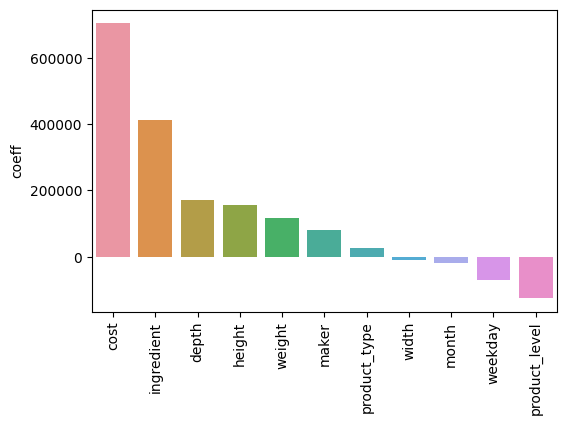

In [65]:
linear_import = model_30[2].coef_
imp_30 = pd.DataFrame(index = ndc_X.columns, data=linear_import, columns = ['coeff'])
imp_30 = imp_30.sort_values('coeff',ascending=False)
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=imp_30.index, y='coeff', data=imp_30)
plt.xticks(rotation=90);

### 1.  Lasso model

In [66]:

steps_31 = [('ndc',Num_Date_Cat_Transformer()),
           ('poly',PolynomialFeatures(degree=2)),
           ('scaler', MinMaxScaler()),
          ('ls',Lasso(alpha=1000))]
model_31 = Pipeline(steps_31)
model_31 = model_31.fit(X_train,y_train)

In [67]:
'''train loss'''
loss('train',X_train, y_train, model_31)

train MAE: 1.05e+05
train MSE: 2.69e+10
train r2: 0.443
train adjusted_r2:0.441


In [68]:
'''test loss'''
loss('test',X_test, y_test, model_31)

test MAE: 1.14e+05
test MSE: 3.03e+10
test r2: 0.404
test adjusted_r2:0.391


In [69]:
model_31[3].coef_

array([     0.        ,  73392.76114209,      0.        ,      0.        ,
            0.        , 104563.97657118,     -0.        ,     -0.        ,
           -0.        ,   5308.21841027,      0.        ,      0.        ,
       215491.1706907 ,      0.        ,      0.        ,  98926.0328292 ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        , 993250.8828257 ,      0.        ,
            0.        ,  21938.45639821,      0.        ,     -0.        ,
           -0.        ,     -0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
           -0.        ,     -0.        ,     -0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
           -0.        ,     -0.        ,     -0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,     -0.        ,
           -0.        ,  

### 2. Adaboost

In [70]:
from sklearn.ensemble import AdaBoostRegressor

In [71]:

r2 = []
for n in range(1,51):
    
    steps_32 = [('ndc',Num_Date_Cat_Transformer()),
          ('ads',AdaBoostRegressor(n_estimators=n,learning_rate = 0.1,random_state =101))]
    model_32 = Pipeline(steps_32)
    model_32 = model_32.fit(X_train,y_train)
    r2.append(r2_score(y_test,model_32.predict(X_test)))

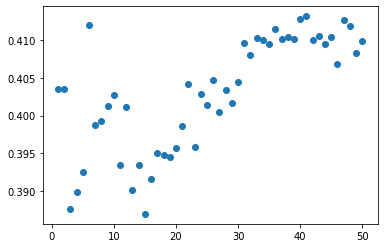

In [72]:
plt.scatter(x=range(1,51),y=r2)

In [384]:
#r2

In [73]:
steps_32 = [('ndc',Num_Date_Cat_Transformer()),
      ('ads',AdaBoostRegressor(n_estimators=30,loss='linear',learning_rate = 0.1,random_state=42))]
model_32 = Pipeline(steps_32)
model_32 = model_32.fit(X_train,y_train)

In [74]:
'''train loss'''
loss('train',X_train, y_train, model_32)

train MAE: 1.12e+05
train MSE: 2.55e+10
train r2: 0.471
train adjusted_r2:0.469


In [75]:
'''test loss'''
loss('test',X_test, y_test, model_32)

test MAE: 1.19e+05
test MSE: 3.01e+10
test r2: 0.409
test adjusted_r2:0.396


In [76]:
feat_import = model_32[1].feature_importances_

In [77]:
ndc_X.columns

Index(['cost', 'depth', 'width', 'height', 'weight', 'weekday', 'month',
       'product_level', 'product_type', 'maker', 'ingredient'],
      dtype='object')

In [78]:
imp_32 = pd.DataFrame(index = ndc_X.columns, data=feat_import, columns = ['importance'])

In [79]:
imp_32 = imp_32.sort_values('importance',ascending=False)

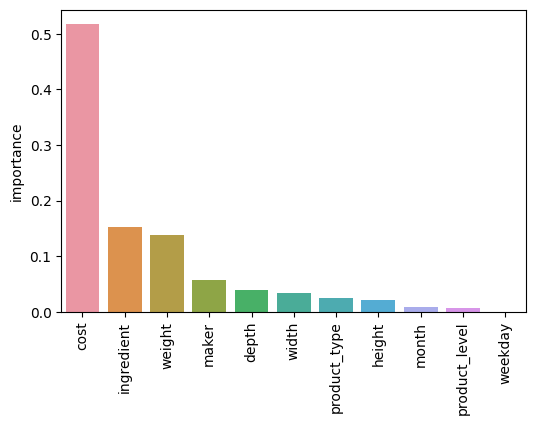

In [80]:
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=imp_32.index, y='importance', data=imp_32)
plt.xticks(rotation=90);

### 3. RandomeForest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
steps_33 = [('ndc',Num_Date_Cat_Transformer()),
      ('rfr',RandomForestRegressor(n_estimators=10,min_samples_split=20,max_depth=4,min_samples_leaf=10))]
model_33 = Pipeline(steps_33)
model_33 = model_33.fit(X_train,y_train)

In [83]:
'''train loss'''
loss('train',X_train, y_train, model_33)

train MAE: 1.00e+05
train MSE: 2.54e+10
train r2: 0.473
train adjusted_r2:0.471


In [84]:
'''test loss'''
loss('test',X_test, y_test, model_33)

test MAE: 1.08e+05
test MSE: 2.88e+10
test r2: 0.433
test adjusted_r2:0.421


In [167]:
params={'rfr__n_estimators': [5,10,20],
       'rfr__min_samples_split':[10,20,30],
       'rfr__max_depth':[3,4,5],
        'rfr__min_samples_leaf': [2,10,20,30]
       }
scorer = make_scorer(mean_squared_error, greater_is_better = False)
steps_34 = [('ndc',Num_Date_Cat_Transformer()),
      ('rfr',RandomForestRegressor())]
model_34 = Pipeline(steps_34)

grid_34 = GridSearchCV(model_34,param_grid = params,cv=5,scoring = scorer)
grid_34 = grid_34.fit(X_train,y_train)

In [168]:
grid_34.best_params_

{'rfr__max_depth': 5,
 'rfr__min_samples_leaf': 10,
 'rfr__min_samples_split': 20,
 'rfr__n_estimators': 20}

In [169]:
'''train loss'''
loss('train',X_train, y_train, grid_34)

train MAE: 9.54e+04
train MSE: 2.31e+10
train r2: 0.520
train adjusted_r2:0.519


In [170]:
'''test loss'''
loss('test',X_test, y_test, grid_34)

test MAE: 1.05e+05
test MSE: 2.76e+10
test r2: 0.458
test adjusted_r2:0.446


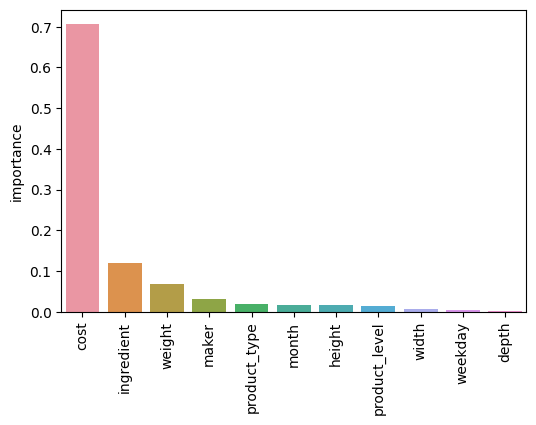

In [173]:
rdf_import = grid_34.best_estimator_[1].feature_importances_
imp_34 = pd.DataFrame(index = ndc_X.columns, data=rdf_import, columns = ['importance'])
imp_34 = imp_34.sort_values('importance',ascending=False)
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=imp_34.index, y='importance', data=imp_34)
plt.xticks(rotation=90);

### 4. GradientBoostRegressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
steps_35 = [('ndc',Num_Date_Cat_Transformer()),
      ('gbr',GradientBoostingRegressor(n_estimators=20,min_samples_split=30,
                                       max_depth=4,min_samples_leaf=10,learning_rate=0.1))]
model_35 = Pipeline(steps_35)
model_35 = model_35.fit(X_train,y_train)

In [87]:
'''train loss'''
loss('train',X_train, y_train, model_35)

train MAE: 9.63e+04
train MSE: 2.25e+10
train r2: 0.534
train adjusted_r2:0.533


In [88]:
'''test loss'''
loss('test',X_test, y_test, model_35)

test MAE: 1.07e+05
test MSE: 2.75e+10
test r2: 0.459
test adjusted_r2:0.448


In [178]:
params={'gbr__n_estimators': [5,10,20],
       'gbr__min_samples_split':[10,20,30],
       'gbr__max_depth':[3,4,5],
        'gbr__min_samples_leaf': [2,10,20,30]
       }
scorer = make_scorer(mean_squared_error, greater_is_better = False)
steps_36 = [('ndc',Num_Date_Cat_Transformer()),
      ('gbr',GradientBoostingRegressor())]
model_36 = Pipeline(steps_36)

grid_36 = GridSearchCV(model_35,param_grid = params,cv=5,scoring = scorer)
grid_36 = grid_36.fit(X_train,y_train)

In [179]:
grid_36.best_params_

{'gbr__max_depth': 4,
 'gbr__min_samples_leaf': 2,
 'gbr__min_samples_split': 30,
 'gbr__n_estimators': 20}

In [180]:
'''train loss'''
loss('train',X_train, y_train, grid_36)

train MAE: 9.49e+04
train MSE: 2.14e+10
train r2: 0.556
train adjusted_r2:0.555


In [181]:
'''test loss'''
loss('test',X_test, y_test, grid_36)

test MAE: 1.07e+05
test MSE: 2.83e+10
test r2: 0.443
test adjusted_r2:0.431


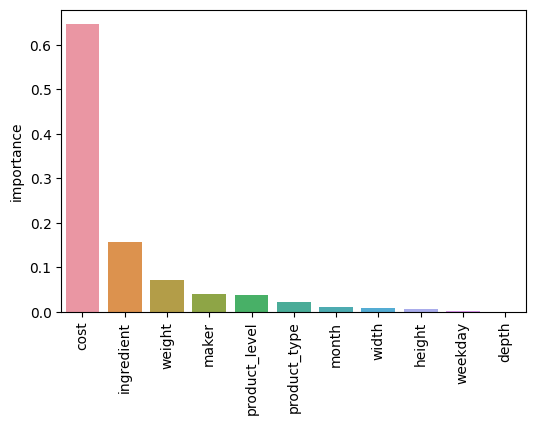

In [183]:

gbr_import = grid_36.best_estimator_[1].feature_importances_
imp_36 = pd.DataFrame(index = ndc_X.columns, data=gbr_import, columns = ['importance'])
imp_36 = imp_36.sort_values('importance',ascending=False)
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=imp_36.index, y='importance', data=imp_36)
plt.xticks(rotation=90);

### 5. XGBRegressor

In [90]:
from xgboost import XGBRegressor

In [91]:
steps_37 = [('ndc',Num_Date_Cat_Transformer()),
      ('xgb',XGBRegressor(n_estimators=100,max_depth=5,reg_lambda=100,gamma = 0, min_child_weight=20,learning_rate=0.05))]
model_37 = Pipeline(steps_37)
model_37 = model_37.fit(X_train,y_train)

In [92]:
'''train loss'''
loss('train',X_train, y_train, model_37)

train MAE: 9.00e+04
train MSE: 2.30e+10
train r2: 0.522
train adjusted_r2:0.521


In [93]:
'''test loss'''
loss('test',X_test, y_test, model_37)

test MAE: 1.00e+05
test MSE: 2.71e+10
test r2: 0.467
test adjusted_r2:0.456


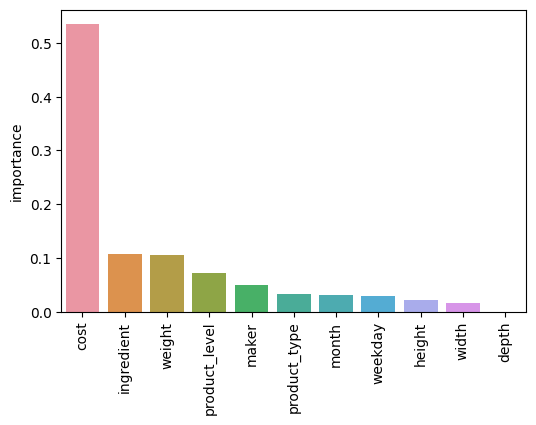

In [94]:
xgb_import = model_37[1].feature_importances_
imp_37 = pd.DataFrame(index = ndc_X.columns, data=xgb_import, columns = ['importance'])
imp_37 = imp_37.sort_values('importance',ascending=False)
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=imp_37.index, y='importance', data=imp_37)
plt.xticks(rotation=90);

In [189]:
parameters= {'xgbr__gamma': [0.0, 0.1, 1], 
              'xgbr__learning_rate': [0.1,0.05], 
              'xgbr__n_estimators': [50, 100], 
              'xgbr__max_depth': [3, 5, 10], 
              'xgbr__lambda': [10,100,200], 
              'xgbr__min_child_weight': [10,20,25,30]}

In [190]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)
steps_38 = [('ndc',Num_Date_Cat_Transformer()),
      ('xgbr',XGBRegressor())]
model_38 = Pipeline(steps_38)

grid_38 = GridSearchCV(model_38,param_grid = parameters,cv=10,scoring = scorer)
grid_38 = grid_38.fit(X_train,y_train)

In [191]:
grid_38.best_params_


{'xgbr__gamma': 0.0,
 'xgbr__lambda': 100,
 'xgbr__learning_rate': 0.1,
 'xgbr__max_depth': 5,
 'xgbr__min_child_weight': 20,
 'xgbr__n_estimators': 100}

In [192]:
'''train loss'''
loss('train',X_train, y_train, grid_38)

train MAE: 8.62e+04
train MSE: 1.97e+10
train r2: 0.591
train adjusted_r2:0.589


In [193]:
'''test loss'''
loss('test',X_test, y_test, grid_38)

test MAE: 9.94e+04
test MSE: 2.57e+10
test r2: 0.495
test adjusted_r2:0.485


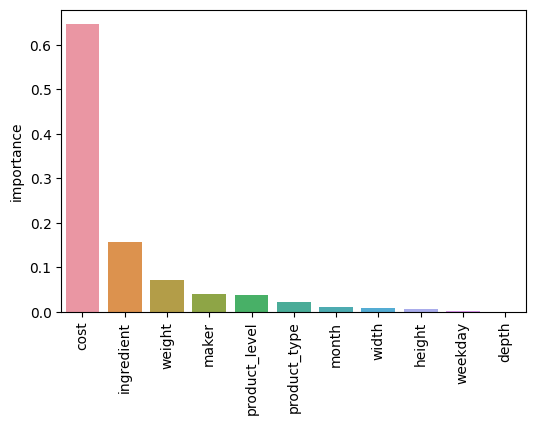

In [194]:
grid38_import = grid_38.best_estimator_[1].feature_importances_
imp_38 = pd.DataFrame(index = ndc_X.columns, data=gbr_import, columns = ['importance'])
imp_38 = imp_38.sort_values('importance',ascending=False)
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=imp_38.index, y='importance', data=imp_38)
plt.xticks(rotation=90);

## Data Tranformer wo maker

In [95]:
class Transformer_wo_maker():
    def fit(self,X,y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        df['depth'] = X.depth
        df['width'] = X.width
        df['height'] = X.height
        df['weight'] = X.weight
        purchase_date = pd.to_datetime(X.purchase_date)
        df['weekday']=purchase_date.dt.weekday
        df['month']=purchase_date.dt.month
        df['product_level'] = X.product_level.map({'unrated':0, 'basic':1,
                                                      'intermediate':2,'advanced':3,'super advanced':4})
        
        self.product_type_dict = X.product_type.value_counts().to_dict() # frequency of each product
        df['product_type'] = X.product_type.map(self.product_type_dict)
#         self.maker_dict = X.maker.value_counts().to_dict()
#         df['maker'] = X.maker.map(self.maker_dict)  # frequency of each maker
        df['ingredient'] = X.ingredient.map(split)  # number of ingredient
        self.median = df.median()                                             
                                                 
    def transform(self,X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        df['depth'] = X.depth
        df['width'] = X.width
        df['height'] = X.height
        df['weight'] = X.weight
        purchase_date = pd.to_datetime(X.purchase_date)
        df['weekday']=purchase_date.dt.weekday
        df['month']=purchase_date.dt.month
        df['product_level'] = X['product_level'].map({'unrated':0, 'basic':1,
                                                      'intermediate':2,'advanced':3,'super advanced':4})
        df['product_type'] = X.product_type.map(self.product_type_dict)
        
#         df['maker'] = X.maker.map(self.maker_dict)  # frequency of each maker
        df['ingredient'] = X.ingredient.map(split)  # number of ingredient
        return df.fillna(self.median)
    
    def fit_transform(self,X,y=None):
        self.fit(X,y)
        return self.transform(X,y)
    
    def split(x):
        if type(x) == str:
            x = x.split(',')
            return len(x)
        else:
            return 0
        
    

In [96]:
twm= Transformer_wo_maker()
twm_X = twm.fit_transform(X_train)

In [97]:
twm_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2708 entries, 279 to 3185
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cost           2708 non-null   float64
 1   depth          2708 non-null   float64
 2   width          2708 non-null   float64
 3   height         2708 non-null   float64
 4   weight         2708 non-null   float64
 5   weekday        2708 non-null   int64  
 6   month          2708 non-null   int64  
 7   product_level  2708 non-null   int64  
 8   product_type   2708 non-null   int64  
 9   ingredient     2708 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 232.7 KB


In [98]:
twm_X.head()

,cost,depth,width,height,weight,weekday,month,product_level,product_type,ingredient
279,659000.0,27.0,102.0,2.70,3310.0,4,3,3,115,5
1012,122000.0,28.0,108.0,2.31,3170.0,4,11,4,145,2
1574,66000.0,28.0,105.0,2.46,3200.0,4,3,4,145,6
1507,122000.0,27.0,104.0,2.43,3120.0,4,1,4,50,2
595,144000.0,27.0,101.0,2.39,2890.0,4,6,4,50,4


### 1.  Lasso model

In [99]:

steps_51 = [('twm',Transformer_wo_maker()),
           ('poly',PolynomialFeatures(degree=2)),
           ('scaler', MinMaxScaler()),
          ('ls',Lasso(alpha=1000))]
model_51 = Pipeline(steps_51)
model_51 = model_51.fit(X_train,y_train)

In [100]:
'''train loss'''
loss('train',X_train, y_train, model_51)

train MAE: 1.04e+05
train MSE: 2.67e+10
train r2: 0.447
train adjusted_r2:0.445


In [101]:
'''test loss'''
loss('test',X_test, y_test, model_51)

test MAE: 1.12e+05
test MSE: 2.89e+10
test r2: 0.431
test adjusted_r2:0.419


In [102]:
model_51[3].coef_

array([     0.        , 270173.80692768,      0.        ,      0.        ,
            0.        , 122274.13912931,     -0.        ,     -0.        ,
           -0.        ,  11203.03749352,      0.        ,      0.        ,
            0.        ,      0.        , 155753.71373386,      0.        ,
            0.        ,     -0.        ,      0.        ,      0.        ,
       858494.54977713,      0.        ,      0.        ,  10492.17053093,
            0.        ,     -0.        ,     -0.        ,     -0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,     -0.        ,     -0.        ,     -0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
           -0.        ,     -0.        ,     -0.        ,      0.        ,
            0.        ,      0.        ,     -0.        ,     -0.        ,
           -0.        ,      0.        , 134687.89294943,     -0.        ,
           -0.        , -

### 5. XGBRegressor

In [103]:
from xgboost import XGBRegressor

In [104]:
steps_52 = [('twm',Transformer_wo_maker()),
      ('xgb',XGBRegressor(n_estimators=100,max_depth=5,reg_lambda=100,gamma = 0, min_child_weight=20,learning_rate=0.05))]
model_52 = Pipeline(steps_52)
model_52 = model_52.fit(X_train,y_train)

In [105]:
'''train loss'''
loss('train',X_train, y_train, model_52)

train MAE: 9.21e+04
train MSE: 2.35e+10
train r2: 0.513
train adjusted_r2:0.511


In [106]:
'''test loss'''
loss('test',X_test, y_test, model_52)

test MAE: 1.01e+05
test MSE: 2.72e+10
test r2: 0.465
test adjusted_r2:0.454


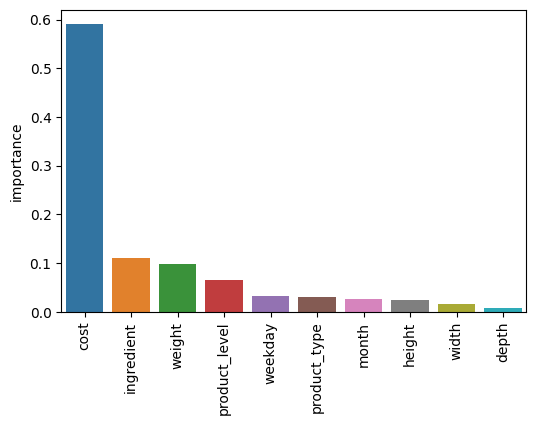

In [107]:
xgb_import = model_52[1].feature_importances_
imp_52 = pd.DataFrame(index = twm_X.columns, data=xgb_import, columns = ['importance'])
imp_52 = imp_52.sort_values('importance',ascending=False)
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=imp_52.index, y='importance', data=imp_52)
plt.xticks(rotation=90);

In [179]:
 df_metrics = pd.DataFrame(columns=['lr_train','lr_test','ls_train','ls_test','adb_train','adb_test','rdf_train',
                                  'rdf_test','gbr_train','gbr_test','xgb_train','xgb_test','ls_fil_rf_train',
                                 'ls_fil_rf_test','rdf_fil_rf_train','rfd_fil_rf_test','wo_maker_ls_train','wo_maker_ls_test',
                                'wo_maker_xgb_train','wo_maker_xgb_test'],
                          data=[test_MSE,test_MAE,test_r2,test_adjusted_r2],
                          index = ['MSE','MAE','r2','adjusted_r2'])
       

df_metrics = df_metrics.transpose()
                                 
                                 

In [182]:
df_metrics

,MSE,MAE,r2,adjusted_r2
lr_train,2.770401e+10,107083.670871,0.425388,0.423257
lr_test,3.007769e+10,113999.531325,0.408573,0.395909
ls_train,2.641127e+10,102547.116927,0.452201,0.450170
ls_test,2.922620e+10,111073.676012,0.425316,0.413010
adb_train,2.499470e+10,109076.802731,0.481582,0.479660
adb_test,2.861266e+10,115777.220242,0.437380,0.425333
rdf_train,2.487262e+10,98572.322476,0.484114,0.482201
rdf_test,2.863211e+10,107338.795558,0.436998,0.424942
gbr_train,2.242530e+10,95890.939996,0.534874,0.533150
gbr_test,2.739626e+10,106379.034173,0.461299,0.449763


In [188]:
df_metrics.index[:12]

Index(['lr_train', 'lr_test', 'ls_train', 'ls_test', 'adb_train', 'adb_test',
       'rdf_train', 'rdf_test', 'gbr_train', 'gbr_test', 'xgb_train',
       'xgb_test'],
      dtype='object')

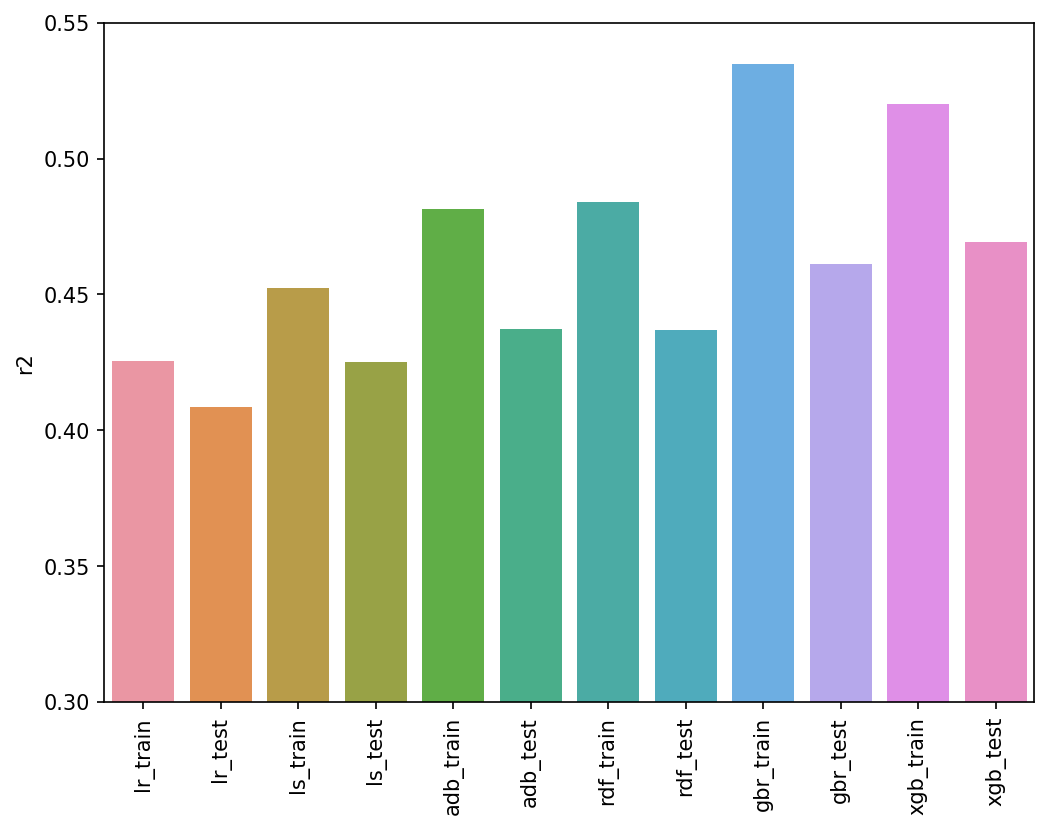

In [206]:
plt.figure(figsize=(8,6),dpi=150)
sns.barplot(x=df_metrics.index[:12],y='r2',data=df_metrics.iloc[:12,:])
plt.ylim(0.3,0.55)
plt.xticks(rotation=90)
#plt.savefig(r'/Users/SFP5a/Documents/Teclent ML camp/r2_comparison.png');

## Data Tranformer with maker

In [212]:
class Transformer_Six_Features():
    def fit(self,X,y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
    #df['depth'] = X.depth
        #df['width'] = X.width
        #df['height'] = X.height
        df['weight'] = X.weight
        purchase_date = pd.to_datetime(X.purchase_date)
        #df['weekday']=purchase_date.dt.weekday
        df['month']=purchase_date.dt.month
        #df['product_level'] = X.product_level.map({'unrated':0, 'basic':1,
        #                                              'intermediate':2,'advanced':3,'super advanced':4})
        
        self.product_type_dict = X.product_type.value_counts().to_dict() # frequency of each product
        df['product_type'] = X.product_type.map(self.product_type_dict)
        self.maker_dict = X.maker.value_counts().to_dict()
        df['maker'] = X.maker.map(self.maker_dict)  # frequency of each maker
        df['ingredient'] = X.ingredient.map(split)  # number of ingredient
        self.median = df.median()                                             
                                                 
    def transform(self,X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        #df['depth'] = X.depth
        #df['width'] = X.width
        #df['height'] = X.height
        df['weight'] = X.weight
        purchase_date = pd.to_datetime(X.purchase_date)
        #df['weekday']=purchase_date.dt.weekday
        df['month']=purchase_date.dt.month
        #df['product_level'] = X['product_level'].map({'unrated':0, 'basic':1,
        #                                              'intermediate':2,'advanced':3,'super advanced':4})
        df['product_type'] = X.product_type.map(self.product_type_dict)
        
        df['maker'] = X.maker.map(self.maker_dict)  # frequency of each maker
        df['ingredient'] = X.ingredient.map(split)  # number of ingredient
        return df.fillna(self.median)
    
    def fit_transform(self,X,y=None):
        self.fit(X,y)
        return self.transform(X,y)
    
    def split(x):
        if type(x) == str:
            x = x.split(',')
            return len(x)
        else:
            return 0
        
    

In [213]:
tsf= Transformer_Six_Features()
tsf_X = tsf.fit_transform(X_train)

In [215]:
#tsf_X

### 1.  Lasso model

In [224]:

steps_61 = [('tsf',Transformer_Six_Features()),
           ('poly',PolynomialFeatures(degree=2)),
           ('scaler', MinMaxScaler()),
          ('ls',Lasso(alpha=1000))]
model_61 = Pipeline(steps_61)
model_61 = model_61.fit(X_train,y_train)

In [225]:
'''train loss'''
loss('train',X_train, y_train, model_61)

train MAE: 1.04e+05
train MSE: 2.70e+10
train r2: 0.441
train adjusted_r2:0.439


In [226]:
'''test loss'''
loss('test',X_test, y_test, model_51)

test MAE: 1.12e+05
test MSE: 2.89e+10
test r2: 0.431
test adjusted_r2:0.419


### 5. XGBRegressor

In [227]:
steps_62 = [('tsf',Transformer_Six_Features()),
      ('xgb',XGBRegressor(n_estimators=100,max_depth=5,reg_lambda=100,gamma = 0, min_child_weight=20,learning_rate=0.05))]
model_62 = Pipeline(steps_62)
model_62 = model_62.fit(X_train,y_train)

In [230]:
'''train loss'''
loss('train',X_train, y_train, model_62)

train MAE: 9.19e+04
train MSE: 2.38e+10
train r2: 0.506
train adjusted_r2:0.504


In [231]:
'''test loss'''
loss('test',X_test, y_test, model_62)

test MAE: 1.02e+05
test MSE: 2.81e+10
test r2: 0.447
test adjusted_r2:0.435


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'cost'),
  Text(1, 0, 'ingredient'),
  Text(2, 0, 'weight'),
  Text(3, 0, 'product_type'),
  Text(4, 0, 'maker'),
  Text(5, 0, 'month')])

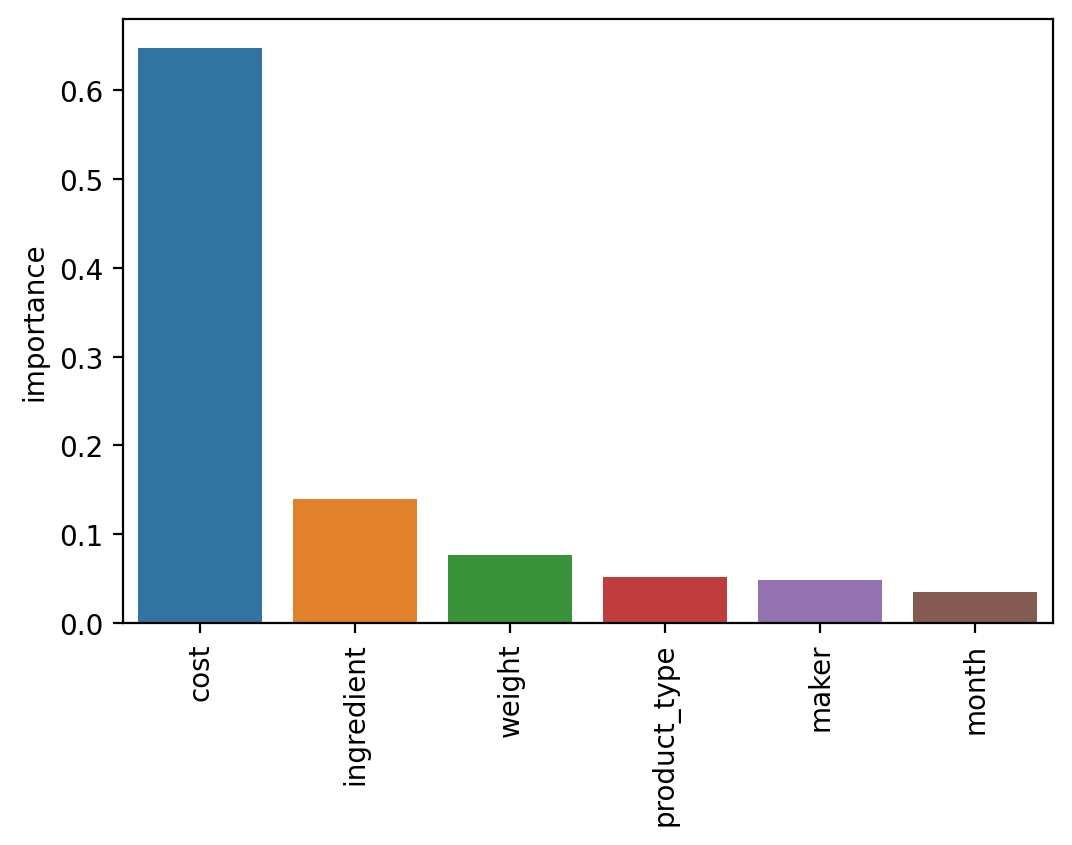

In [238]:
xgb_import = model_62[1].feature_importances_
imp_62 = pd.DataFrame(index = tsf_X.columns, data=xgb_import, columns = ['importance'])
imp_62 = imp_62.sort_values('importance',ascending=False)
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(x=imp_62.index, y='importance', data=imp_62)
plt.xticks(rotation=90)
#plt.savefig(r'/Users/SFP5a/Documents/Teclent ML camp/6feat_imp.png')

# Summary

1. Pretty good model performance (r2 ~ 0.45) and good varience was achieved based on our transformed data. 
2. Extracting ingredient number in each product is key to the performance
3. Feature importances are very consistent on different models, which showed that the price is mainly dependent on the cost,secondly on number of ingredients. Besides that, product_weight, the size of product, product_level also affect the price.

